In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Black Lives Matter Twitter Sentiment Analysis

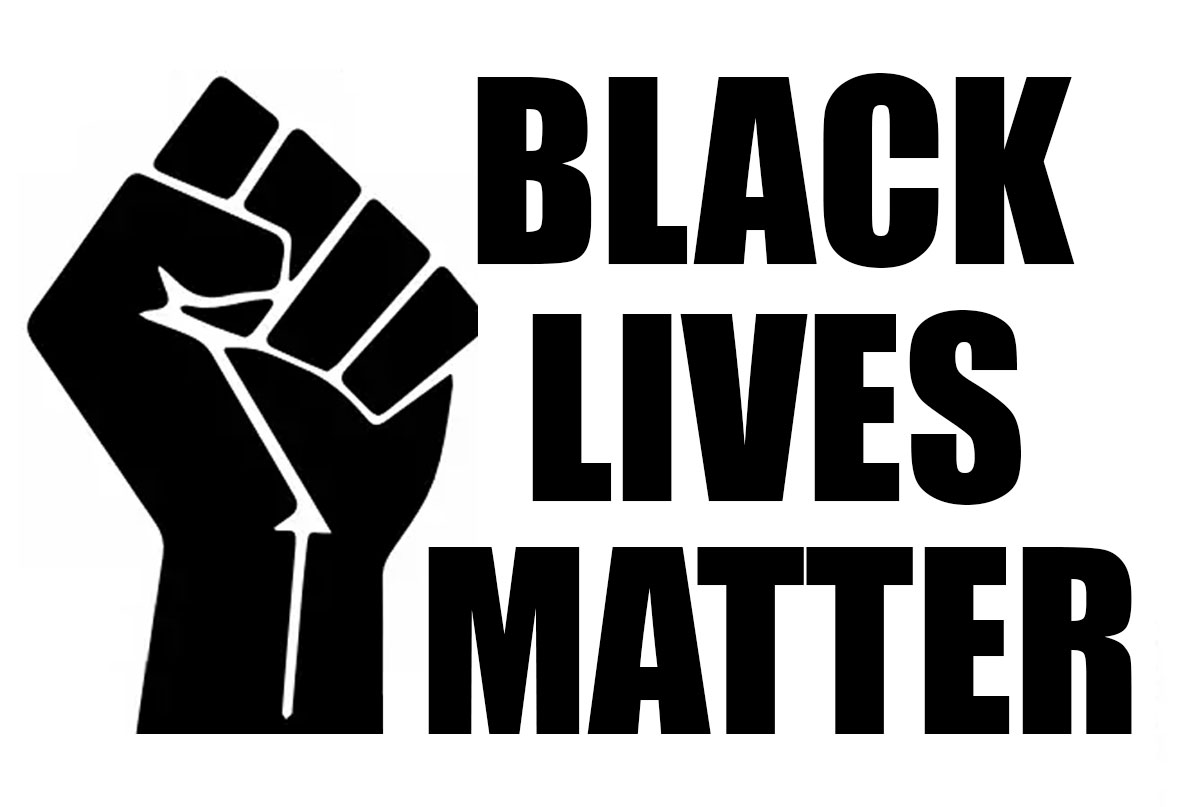

In [2]:
from IPython.display import Image
Image(filename='blacklivesmatter-1.jpeg')

In [3]:
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re

In [19]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [4]:
blm = pd.read_csv('blacklivesmatter.csv')

# Tweets Dataset

In [5]:
blm.head()

,TWEET,COMMENTS,LIKES,RETWEETS
0,Tonight’s debate made something clear. We have...,404,9.6K,2.6K
1,"Thanks so much for the work you’ve done, AND w...",13,276,38
2,It’s the thing we’ve been doing for the last 5...,97,2.9K,694
3,We’ve launched a new website to get you out to...,24,326,102
4,Voter registration deadlines for today! Kans...,37,671,435


In [6]:
blm.shape

(758, 4)

In [7]:
blm.isnull().sum()

TWEET        3
COMMENTS    82
LIKES        0
RETWEETS     0
dtype: int64

In [8]:
#Filling the empty tweets with the stopword 'and', as the stopwords get removed ahead in the code

In [9]:
blm['TWEET'].fillna('and', inplace =True)

In [10]:
blm.isnull().sum()

TWEET        0
COMMENTS    82
LIKES        0
RETWEETS     0
dtype: int64

In [11]:
blm.drop(['COMMENTS','LIKES'], axis=1, inplace=True)

In [12]:
blm.columns = ['Tweets','Retweets']

In [13]:
blm["word_count"] = blm["Tweets"].apply(lambda tweet: len(tweet.split()))

In [14]:
dfs = blm

In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [16]:
senti_analyzer = SentimentIntensityAnalyzer()

In [17]:
compound_score = []

for sen in dfs['Tweets']:
    
    compound_score.append(senti_analyzer.polarity_scores(sen)['compound'])

In [18]:
dfs['Compound Score'] = compound_score

In [19]:
Sentiment = []

for i in compound_score:
    
    if i >= 0.05:
        
        Sentiment.append('Positive')
        
    elif i > -0.05 and i < 0.05:
        
        Sentiment.append('Neutral')
        
    else:
        
        Sentiment.append('Negative')
        

In [20]:
dfs['Sentiment'] = Sentiment

In [21]:
dfs.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
0,Tonight’s debate made something clear. We have...,2.6K,42,0.7934,Positive
1,"Thanks so much for the work you’ve done, AND w...",38,44,0.9184,Positive
2,It’s the thing we’ve been doing for the last 5...,694,24,0.2960,Positive
3,We’ve launched a new website to get you out to...,102,21,0.2695,Positive
4,Voter registration deadlines for today! Kans...,435,14,0.0000,Neutral


# Tweets Word Count Distribution

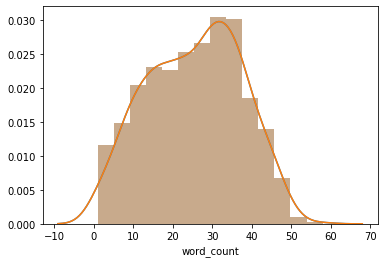

In [22]:
# Word Count Distribution Histogram
sns_plot = sns.distplot(dfs['word_count'])
fig = sns_plot.get_figure()
fig.savefig("blm_word_count.png")
sns.distplot(dfs['word_count'])

In [23]:
pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

# Sentiment Distribution of the Tweets

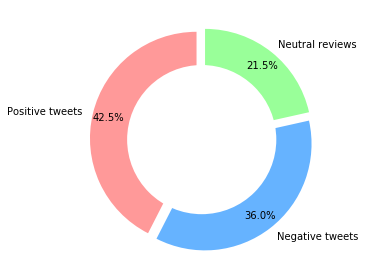

In [24]:
# Sentiment Distribution

pos_count = sum(dfs['Sentiment']=='Positive')
neg_count = sum(dfs['Sentiment']=='Negative')
neu_count = sum(dfs['Sentiment']=='Neutral')

import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive tweets', 'Negative tweets', 'Neutral reviews']
sizes = [pos_count, neg_count, neu_count]
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05)
 
    
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.tight_layout()
plt.savefig('blm_sentiment_distribution.png')

plt.show()

# Most Positive Tweet

In [25]:
# Most Positive Tweet

pos_max = dfs.loc[dfs['Compound Score']==max(dfs['Compound Score'])]

In [26]:
pos_max[:1]

,Tweets,Retweets,word_count,Compound Score,Sentiment
489,It very hard right now and it’s ok to feel des...,715,39,0.9631,Positive


# Most Negative Tweet

In [27]:
# Most Negative Tweet

neg_max = dfs.loc[dfs['Compound Score']==min(dfs['Compound Score'])]
neg_max

,Tweets,Retweets,word_count,Compound Score,Sentiment
229,Violence is: 585 Angelenos being killed by pol...,81,29,-0.9705,Negative


# Positive Tweets

In [28]:
# Positive Tweets

gp = dfs.groupby(by=['Sentiment'])
positive_tweets = gp.get_group('Positive')
positive_tweets.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
0,Tonight’s debate made something clear. We have...,2.6K,42,0.7934,Positive
1,"Thanks so much for the work you’ve done, AND w...",38,44,0.9184,Positive
2,It’s the thing we’ve been doing for the last 5...,694,24,0.2960,Positive
3,We’ve launched a new website to get you out to...,102,21,0.2695,Positive
5,This episode is SO GOOD. @JoyAnnReid breaks ...,33,13,0.7631,Positive


In [29]:
positive_tweets.shape

(322, 5)

# Negative Tweets

In [30]:
# Negative Tweets

negative_tweets = gp.get_group('Negative')
negative_tweets.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
12,27 days until the elections!! Register to vote...,200,37,-0.4710,Negative
13,A grand jury failed to bring charges against B...,366,46,-0.2382,Negative
18,Black women in the United States are three to ...,357,36,-0.3321,Negative
21,Climate Change Is Not A Future Problem For Com...,69,18,-0.1134,Negative
22,Black folks in the path of worsening hurricane...,107,33,-0.1779,Negative


In [31]:
negative_tweets.shape

(273, 5)

# Neutral Tweets

In [32]:
# Neutral Tweets

neutral_tweets = gp.get_group('Neutral')
neutral_tweets.head()

,Tweets,Retweets,word_count,Compound Score,Sentiment
4,Voter registration deadlines for today! Kans...,435,14,0.0,Neutral
6,#NewProfilePic,123,1,0.0,Neutral
7,#BlackLivesMatter rises with the Nigerian peo...,28.2K,9,0.0,Neutral
10,States with voter registration deadlines TODAY...,210,19,0.0,Neutral
14,Let’s pass the #BreatheAct https://breatheac...,143,5,0.0,Neutral


In [33]:
neutral_tweets.shape

(163, 5)

# Wordcloud Function

In [34]:
# Wordcloud Function

def plot_Cloud(wordCloud):
    plt.figure( figsize=(20,10), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()

In [35]:
def wordcloud(data):
    
    words_corpus = ''
    words_list = []

    
    for rev in data["Tweets"]:
        
        text = str(rev).lower()
        text = text.replace('rt', ' ') 
        
        
        text = re.sub(r"http\S+", "", text)        
        text = re.sub(r'[^\w\s]','',text)
        text = ''.join([i for i in text if not i.isdigit()])
        
        tokens = nltk.word_tokenize(text)
        tokens = [word for word in tokens if word not in stopwords.words('english')]
        
        for word in tokens[:]: 
            if word.startswith('@'): 
                tokens.remove(word) 
        # Remove aplha numeric characters
        
        for words in tokens:
            
            words_corpus = words_corpus + words + " "
            words_list.append(words)
            
    return words_corpus, words_list

In [37]:
import numpy as np

In [38]:
import cv2
image1 = cv2.imread('mask1.png')
mask = np.array(image1)

# WordCloud - Positive Tweets

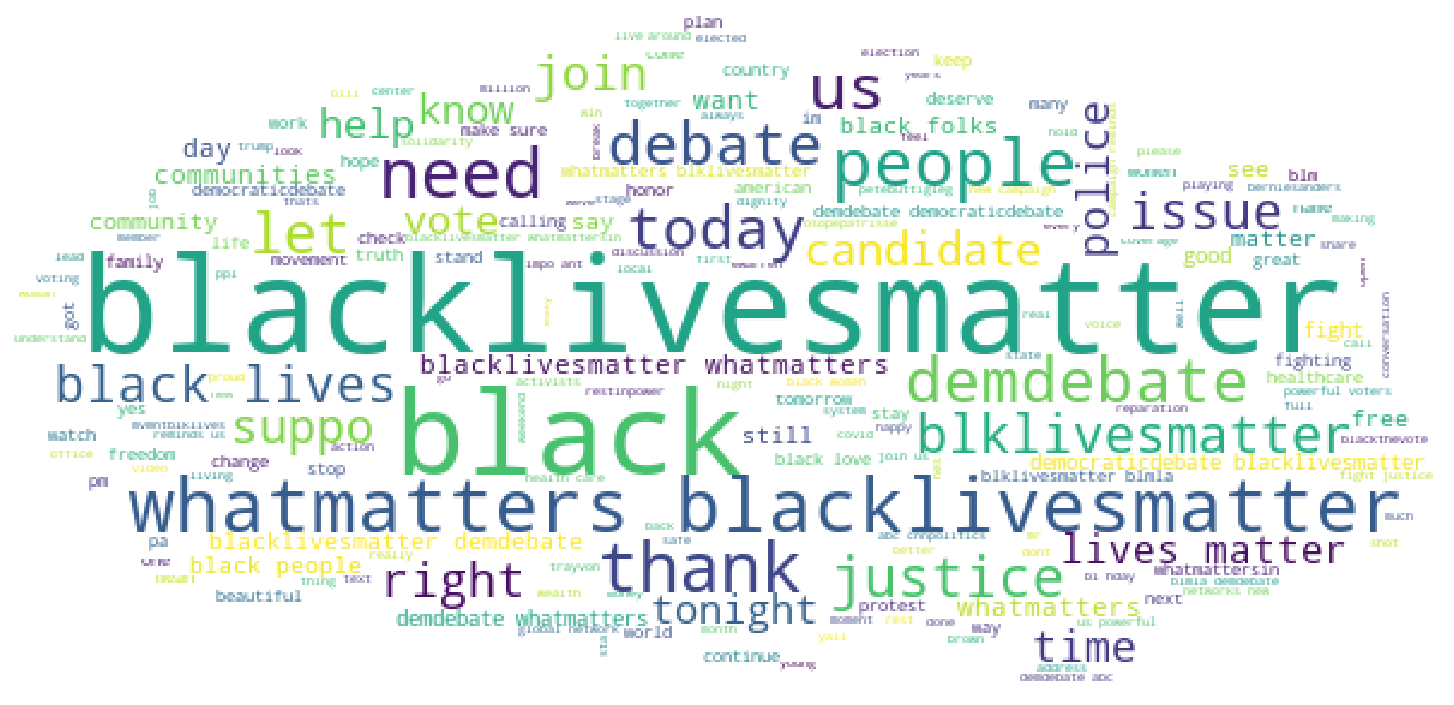

In [39]:
# WordCloud - Positive Tweets

from wordcloud import WordCloud
positive_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(positive_tweets)[0])
    
plot_Cloud(positive_wordcloud)
positive_wordcloud.to_file('blm_positive_tweets_wc.png')


# WordCloud - Negative Tweets

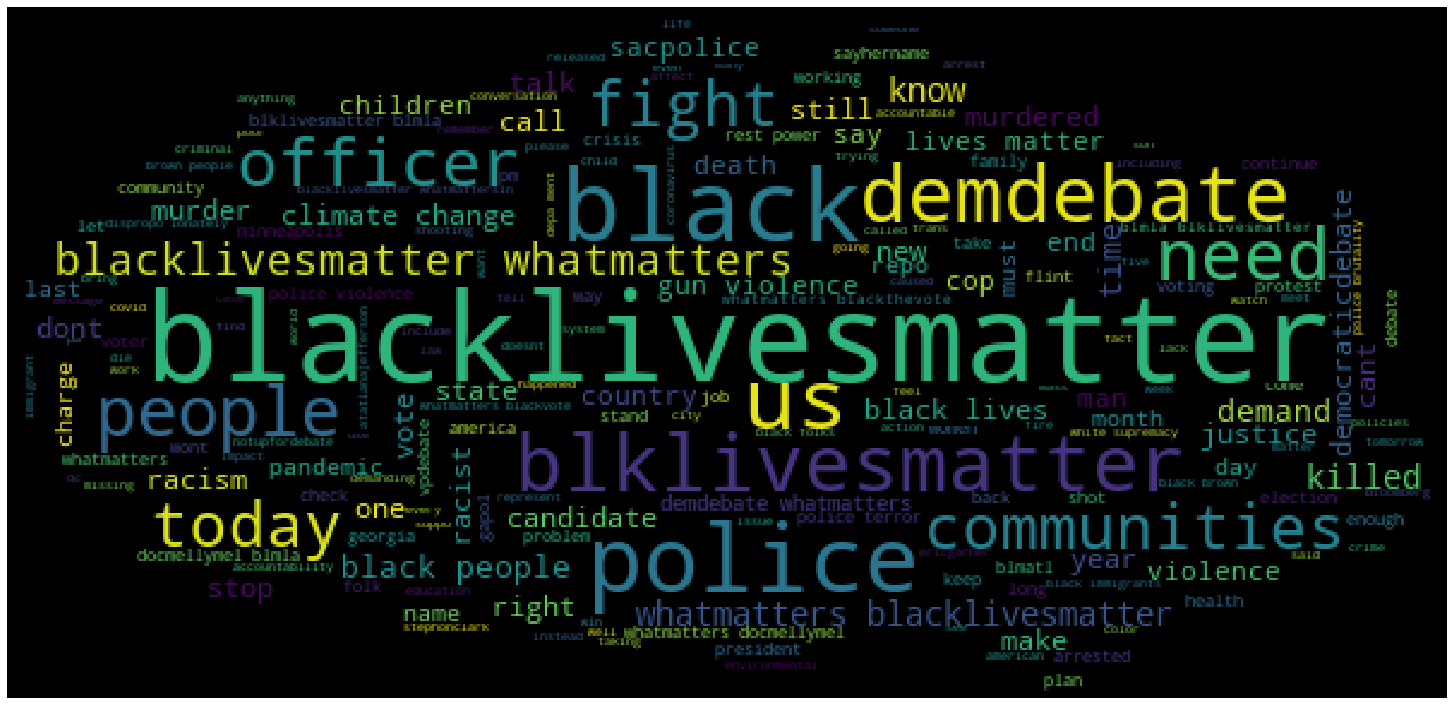

In [40]:
# WordCloud - Negative Tweets

negative_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(negative_tweets)[0])

plot_Cloud(negative_wordcloud)
negative_wordcloud.to_file('blm_negative_tweets_wc.png')


# WordCloud - Neutral Tweets

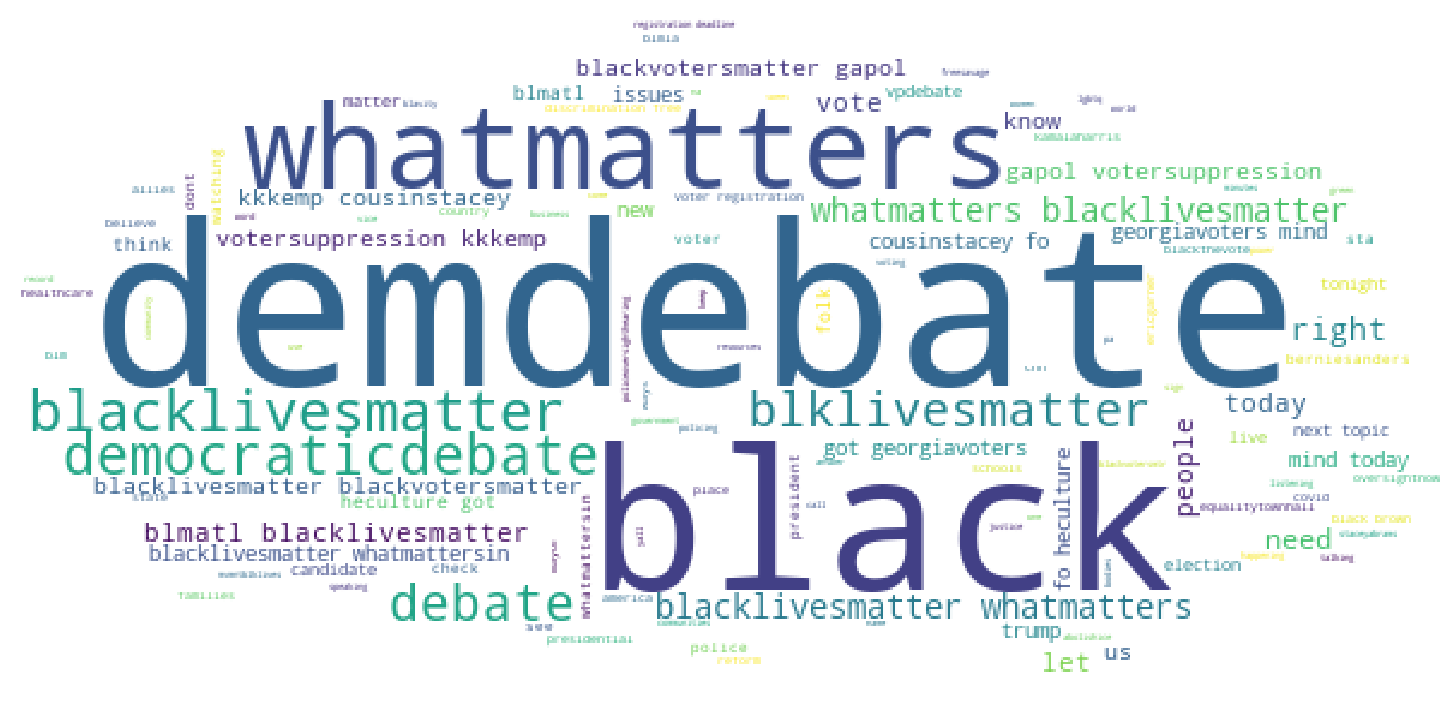

In [41]:
# WordCloud - Neutral Tweets

neutral_wordcloud = WordCloud(background_color= "white",mask=mask,width=900, height=500).generate(wordcloud(neutral_tweets)[0])

plot_Cloud(neutral_wordcloud)
neutral_wordcloud.to_file('blm_neutral_tweets_wc.png')


# Wordcloud - All Tweets

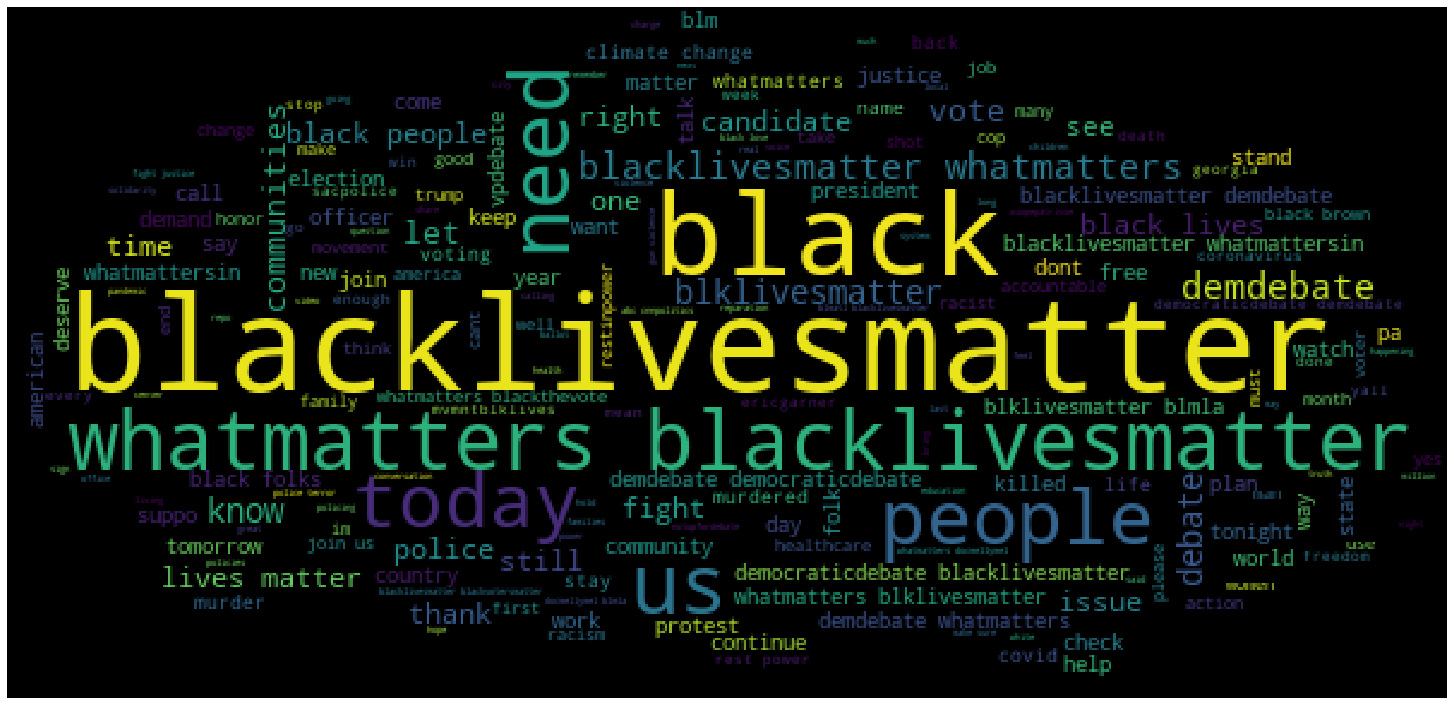

In [42]:
# Wordcloud - All Tweets

total_wordcloud = WordCloud(mask=mask,width=900, height=500).generate(wordcloud(dfs)[0])

plot_Cloud(total_wordcloud)
total_wordcloud.to_file('blm_total_tweets_wc.png')


# Most Frequent Words - Total Tweets

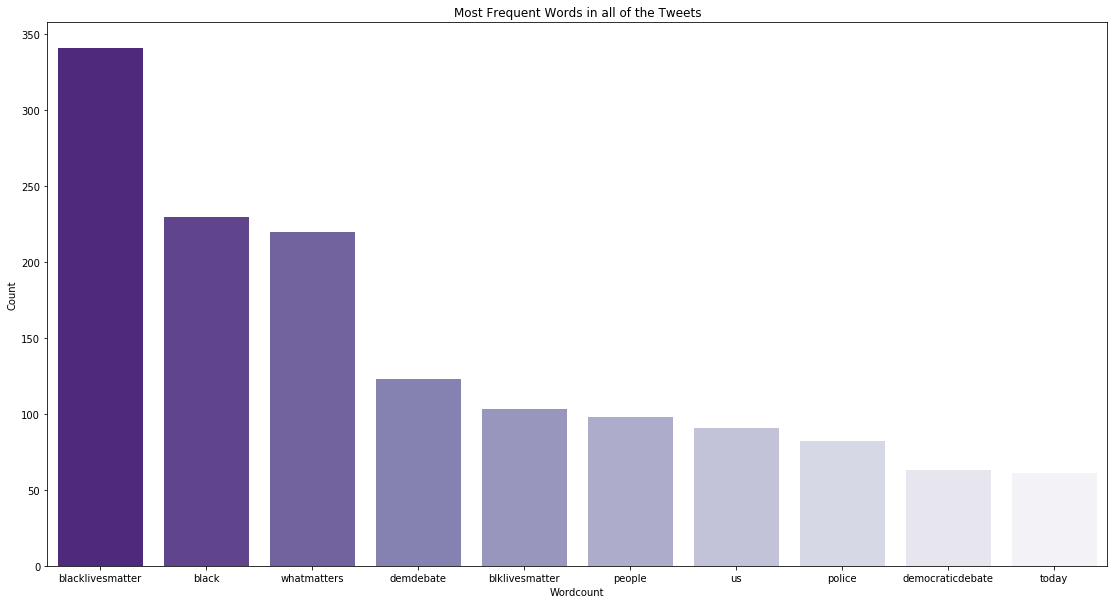

In [43]:
# Most Frequent Words - Total Tweets

aa = nltk.FreqDist(wordcloud(dfs)[1])
dd = pd.DataFrame({'Wordcount': list(aa.keys()),
                  'Count': list(aa.values())})
# selecting top 10 most frequent hashtags     
dd = dd.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in all of the Tweets')
ax = sns.barplot(data=dd, palette="Purples_r",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("blm_total_tweets_wf.png")
plt.show()

# Most Frequent Words - Positive Tweets

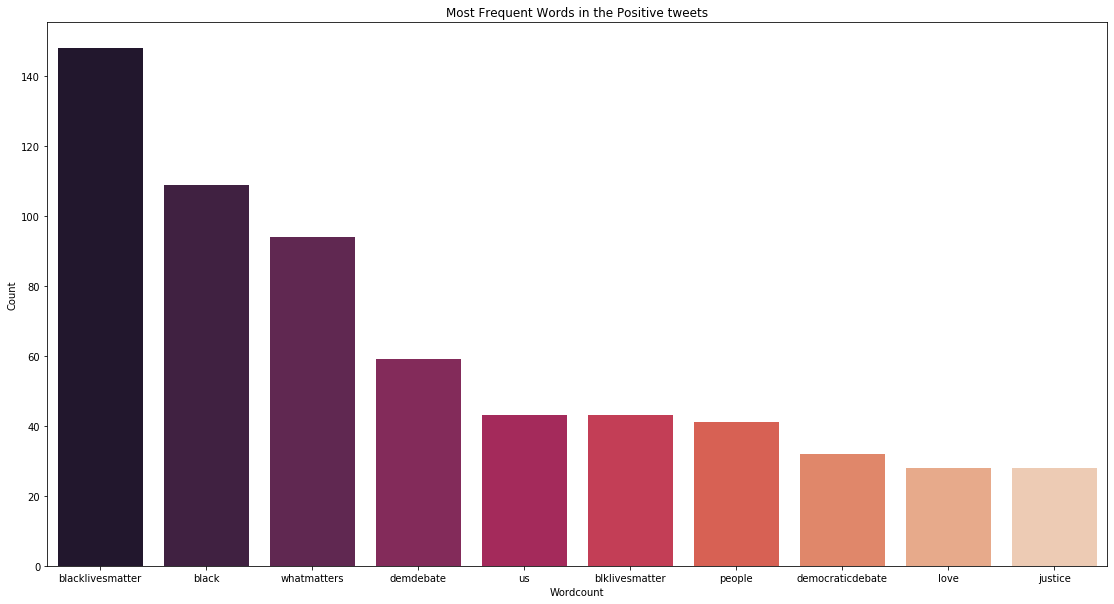

In [44]:
# Most Frequent Words - Positive Tweets

ap = nltk.FreqDist(wordcloud(positive_tweets)[1])
dp = pd.DataFrame({'Wordcount': list(ap.keys()),
                  'Count': list(ap.values())})
# selecting top 10 most frequent hashtags     
dp = dp.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Positive tweets')
ax = sns.barplot(data=dp, palette="rocket",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("blm_positive_tweets_wf.png")
plt.show()

# Most Frequent Words - Negative Tweets

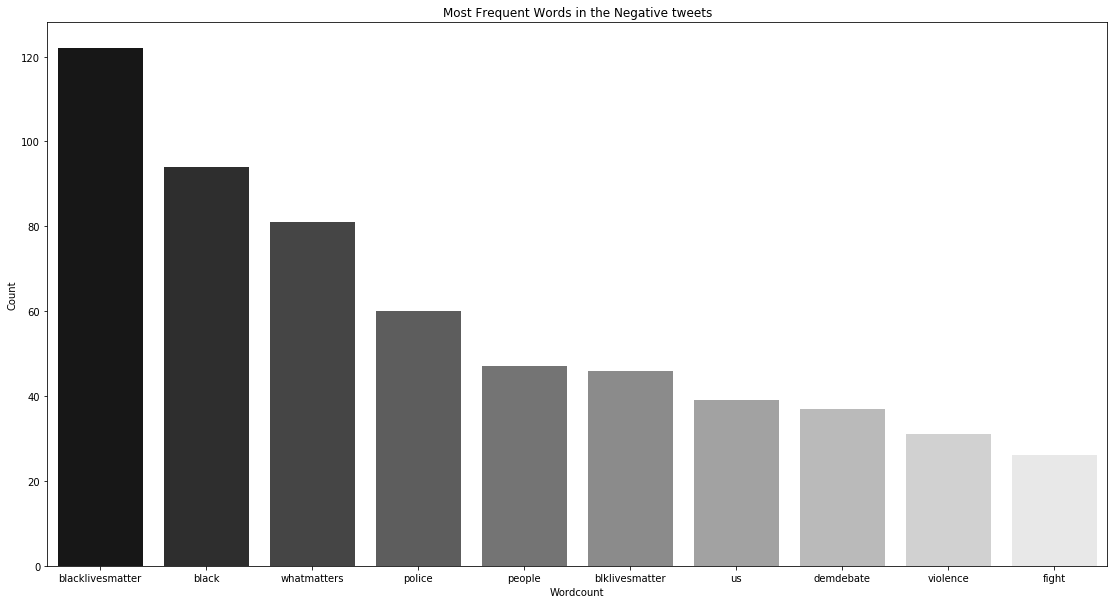

In [45]:
# Most Frequent Words - Negative Tweets

an = nltk.FreqDist(wordcloud(negative_tweets)[1])
dn = pd.DataFrame({'Wordcount': list(an.keys()),
                  'Count': list(an.values())})
# selecting top 10 most frequent hashtags     
dn = dn.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Negative tweets')
ax = sns.barplot(data=dn, palette="gray",x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("blm_negative_tweets_wf.png")
plt.show()

# Most Frequent Words - Neutral Tweets

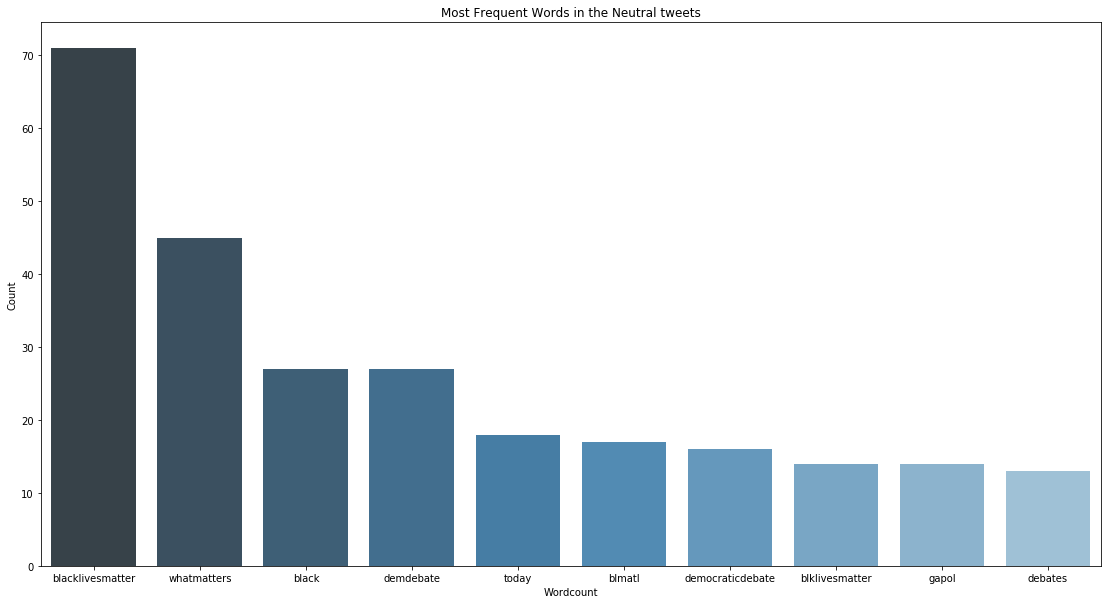

In [46]:
# Most Frequent Words - Neutral Tweets

au = nltk.FreqDist(wordcloud(neutral_tweets)[1])
du = pd.DataFrame({'Wordcount': list(au.keys()),
                  'Count': list(au.values())})
# selecting top 10 most frequent hashtags     
du = du.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(19,10))
plt.title('Most Frequent Words in the Neutral tweets')
ax = sns.barplot(data=du,palette= "Blues_d", x= "Wordcount", y = "Count")
ax.set(ylabel = 'Count')
fig = ax.get_figure()
fig.savefig("blm_neutral_tweets_wf.png")
plt.show()